<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Ecuacion_de_calor_comparaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASO a) h = 0.1, k = 0.0005
Parámetro r = 0.050000

CASO b) h = 0.1, k = 0.01
Parámetro r = 1.000000
ADVERTENCIA: r = 1.000000 > 0.5, el método puede ser inestable

COMPARACIÓN EN t = 0.5 - CASO a)
       x     Numérico       Exacto        Error
--------------------------------------------------
   0.000     0.000000     0.000000     0.000000
   0.100     0.002287     0.002222     0.000064
   0.200     0.004349     0.004227     0.000122
   0.300     0.005986     0.005818     0.000168
   0.400     0.007037     0.006840     0.000197
   0.500     0.007399     0.007192     0.000207
   0.600     0.007037     0.006840     0.000197
   0.700     0.005986     0.005818     0.000168
   0.800     0.004349     0.004227     0.000122
   0.900     0.002287     0.002222     0.000064
   1.000     0.000000     0.000000     0.000000

COMPARACIÓN EN t = 0.5 - CASO b)
       x     Numérico       Exacto        Error
--------------------------------------------------
   0.000     0.000000     0.000000     0.0

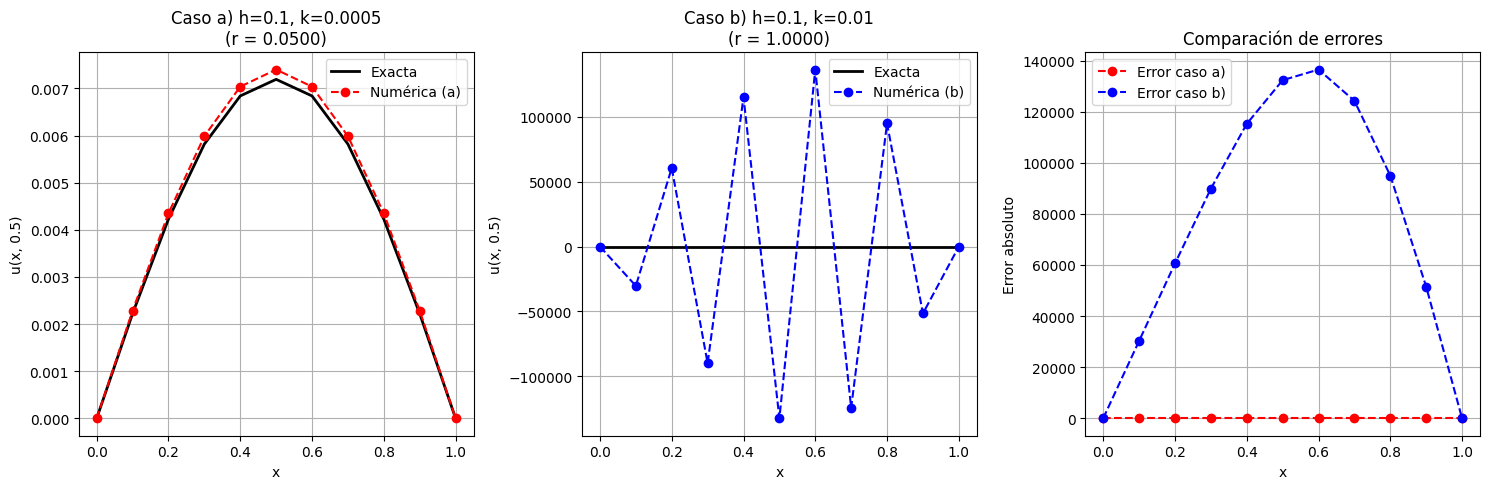


RESUMEN ESTADÍSTICO DE ERRORES EN t = 0.5
Caso a) - Error máximo: 0.000207
Caso a) - Error RMS:    0.000140
Caso b) - Error máximo: 136478.809075
Caso b) - Error RMS:    90045.292968


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solucion_exacta(x, t):
    """Solución exacta del problema"""
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

def resolver_calor_explicito(h, k, t_final):
    """
    Parámetros:
    h: tamaño de paso en espacio
    k: tamaño de paso en tiempo
    t_final: tiempo final para la solución
    """

    # Número de puntos en espacio y tiempo
    Nx = int(1/h) + 1
    Nt = int(t_final/k) + 1

    # Crear malla
    x = np.linspace(0, 1, Nx)
    t = np.linspace(0, t_final, Nt)

    # Matriz de solución
    u = np.zeros((Nx, Nt))

    # Condición inicial
    u[:, 0] = np.sin(np.pi * x)

    # Condiciones de frontera
    u[0, :] = 0
    u[-1, :] = 0

    # Parámetro r para el método explícito
    r = k / (h**2)

    print(f"Parámetro r = {r:.6f}")

    # Verificar estabilidad (condición CFL)
    if r > 0.5:
        print(f"ADVERTENCIA: r = {r:.6f} > 0.5, el método puede ser inestable")

    # Método explícito
    for j in range(0, Nt-1):
        for i in range(1, Nx-1):
            u[i, j+1] = u[i, j] + r * (u[i+1, j] - 2*u[i, j] + u[i-1, j])

    return x, t, u

# Parámetros del problema
t_final = 0.5

# Caso a) h = 0.1, k = 0.0005
print("=" * 50)
print("CASO a) h = 0.1, k = 0.0005")
print("=" * 50)
x_a, t_a, u_a = resolver_calor_explicito(h=0.1, k=0.0005, t_final=t_final)

# Caso b) h = 0.1, k = 0.01
print("\n" + "=" * 50)
print("CASO b) h = 0.1, k = 0.01")
print("=" * 50)
x_b, t_b, u_b = resolver_calor_explicito(h=0.1, k=0.01, t_final=t_final)

# Comparación en t = 0.5
t_target = 0.5
idx_a = np.argmin(np.abs(t_a - t_target))
idx_b = np.argmin(np.abs(t_b - t_target))

# Solución exacta en t = 0.5
u_exacta = solucion_exacta(x_a, t_target)

# Resultados para el caso a)
print("\n" + "=" * 60)
print("COMPARACIÓN EN t = 0.5 - CASO a)")
print("=" * 60)
print(f"{'x':>8} {'Numérico':>12} {'Exacto':>12} {'Error':>12}")
print("-" * 50)
for i in range(len(x_a)):
    error = abs(u_a[i, idx_a] - u_exacta[i])
    print(f"{x_a[i]:8.3f} {u_a[i, idx_a]:12.6f} {u_exacta[i]:12.6f} {error:12.6f}")

# Resultados para el caso b)
print("\n" + "=" * 60)
print("COMPARACIÓN EN t = 0.5 - CASO b)")
print("=" * 60)
print(f"{'x':>8} {'Numérico':>12} {'Exacto':>12} {'Error':>12}")
print("-" * 50)
for i in range(len(x_b)):
    error = abs(u_b[i, idx_b] - solucion_exacta(x_b[i], t_target))
    print(f"{x_b[i]:8.3f} {u_b[i, idx_b]:12.6f} {solucion_exacta(x_b[i], t_target):12.6f} {error:12.6f}")

# Gráficas comparativas
plt.figure(figsize=(15, 5))

# Caso a)
plt.subplot(1, 3, 1)
plt.plot(x_a, u_exacta, 'k-', linewidth=2, label='Exacta')
plt.plot(x_a, u_a[:, idx_a], 'ro--', markersize=6, label='Numérica (a)')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title(f'Caso a) h=0.1, k=0.0005\n(r = {0.0005/0.01:.4f})')
plt.legend()
plt.grid(True)

# Caso b)
plt.subplot(1, 3, 2)
plt.plot(x_b, u_exacta, 'k-', linewidth=2, label='Exacta')
plt.plot(x_b, u_b[:, idx_b], 'bo--', markersize=6, label='Numérica (b)')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title(f'Caso b) h=0.1, k=0.01\n(r = {0.01/0.01:.4f})')
plt.legend()
plt.grid(True)

# Comparación de errores
plt.subplot(1, 3, 3)
error_a = np.abs(u_a[:, idx_a] - u_exacta)
error_b = np.abs(u_b[:, idx_b] - solucion_exacta(x_b, t_target))
plt.plot(x_a, error_a, 'ro--', markersize=6, label='Error caso a)')
plt.plot(x_b, error_b, 'bo--', markersize=6, label='Error caso b)')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Comparación de errores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Resumen estadístico
print("\n" + "=" * 60)
print("RESUMEN ESTADÍSTICO DE ERRORES EN t = 0.5")
print("=" * 60)
error_max_a = np.max(error_a)
error_max_b = np.max(error_b)
error_rms_a = np.sqrt(np.mean(error_a**2))
error_rms_b = np.sqrt(np.mean(error_b**2))

print(f"Caso a) - Error máximo: {error_max_a:.6f}")
print(f"Caso a) - Error RMS:    {error_rms_a:.6f}")
print(f"Caso b) - Error máximo: {error_max_b:.6f}")
print(f"Caso b) - Error RMS:    {error_rms_b:.6f}")